In [1]:
!pip uninstall -y tensorflow tensorflow-cpu


Found existing installation: tensorflow 2.16.2
Uninstalling tensorflow-2.16.2:
  Successfully uninstalled tensorflow-2.16.2


In [2]:
!pip install tensorflow-cpu


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 MB 10.2 MB/s eta 0:00:0000:0100:01


In [ ]:
import tensorflow as tf
print(tf.__version__)
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from scipy.signal import butter, lfilter

In [39]:
# Загрузим данные (можно заменить на путь к файлу)
anomaly_df = pd.read_csv('/Users/macbook/Desktop/ECG Heartbeat Categorization Dataset/ptbdb_abnormal.csv').iloc[:, :-1]
normal_df = pd.read_csv('/Users/macbook/Desktop/ECG Heartbeat Categorization Dataset/ptbdb_normal.csv').iloc[:, :-1]
# /Users/macbook/Desktop/ECG Heartbeat Categorization Dataset/
normal_df.head()

,1.000000000000000000e+00,9.003241658210754395e-01,3.585899472236633301e-01,5.145867168903350830e-02,4.659643396735191345e-02,1.268233358860015869e-01,1.333063244819641113e-01,1.191247999668121338e-01,1.106158867478370667e-01,1.130470037460327148e-01,...,0.000000000000000000e+00.55,0.000000000000000000e+00.56,0.000000000000000000e+00.57,0.000000000000000000e+00.58,0.000000000000000000e+00.59,0.000000000000000000e+00.60,0.000000000000000000e+00.61,0.000000000000000000e+00.62,0.000000000000000000e+00.63,0.000000000000000000e+00.64
0,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.948983,0.505265,0.004176,0.022513,0.059550,0.107298,0.110385,0.111293,0.116558,0.118192,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
print("Форма нормальных данных", normal_df.shape)
print("Форма аномальных данных", anomaly_df.shape)

Форма нормальных данных (4045, 187)
Форма аномальных данных (10505, 187)


In [8]:
# Загрузим данные (можно заменить на путь к файлу)
train_data = pd.read_csv('/Users/macbook/Desktop/ECG Heartbeat Categorization Dataset/mitbih_train.csv')
test_data = pd.read_csv('/Users/macbook/Desktop/ECG Heartbeat Categorization Dataset/mitbih_test.csv')
# /Users/macbook/Desktop/ECG Heartbeat Categorization Dataset/

In [38]:
#print(abnormal)

Приведенный ниже код генерирует визуальное сравнение двух случайно выбранных образцов сигнала ЭКГ: одного из набора данных «Нормальный», а другого — из набора данных «Аномалия». Этот параллельный график позволяет провести прямую визуальную оценку структуры сигналов ЭКГ в нормальных и аномальных случаях. 

In [51]:
def plot_sample(normal, anomaly):
    index = np.random.randint(0, len(normal_df), 2)
    
    fig, ax = plt.subplots(1, 2, sharey=True, figsize=(10, 4))
    ax[0].plot(normal.iloc[index[0], :].values, label=f"Случай {index[0]}")
    ax[0].plot(normal.iloc[index[1], :].values, label=f"Случай {index[1]}")
    ax[0].legend(shadow=True, frameon=True, facecolor="inherit", loc=1, fontsize=9)
    ax[0].set_title("Нормальный")
    
    ax[1].plot(anomaly.iloc[index[0], :].values, label=f"Случай {index[0]}")
    ax[1].plot(anomaly.iloc[index[1], :].values, label=f"Случай {index[1]}")
    ax[1].legend(shadow=True, frameon=True, facecolor="inherit", loc=1, fontsize=9)
    ax[1].set_title("Аномалия")
    
    plt.tight_layout()
    plt.show()

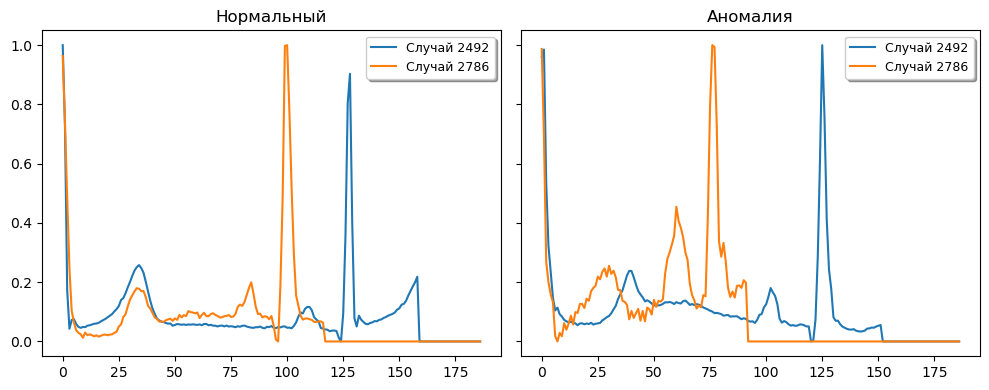

In [52]:
plot_sample(normal_df, anomaly_df)

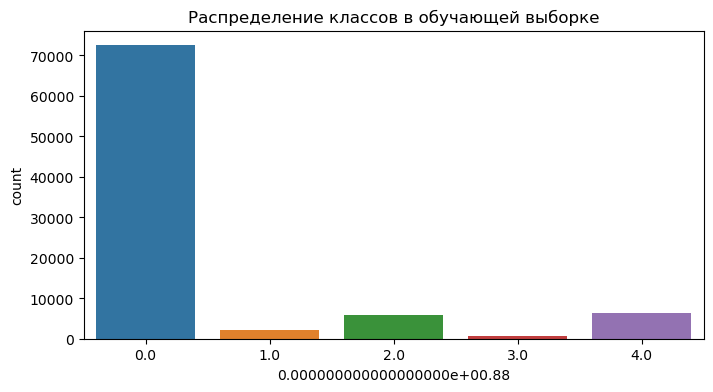

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.countplot(x=y_train)
plt.title("Распределение классов в обучающей выборке")
plt.show()


In [53]:
CLASS_NAMES = ["Нормальный", "Аномалия"]

normal_df_copy = normal_df.copy()
anomaly_df_copy = anomaly_df.copy()
print(anomaly_df_copy.columns.equals(normal_df_copy.columns))

False


In [54]:
normal_df_copy = normal_df_copy.set_axis(range(1, 188), axis=1)
anomaly_df_copy = anomaly_df_copy.set_axis(range(1, 188), axis=1)
normal_df_copy = normal_df_copy.assign(target = CLASS_NAMES[0])
anomaly_df_copy = anomaly_df_copy.assign(target = CLASS_NAMES[1])


df = pd.concat((normal_df_copy, anomaly_df_copy))

# Сглаженный график среднего значения для сравнения классов

В этом коде Python определена функция под названием plot_smoothed_mean для создания сглаженных средних графиков. В качестве параметров он принимает входные данные, имя класса и размер шага. Функция вычисляет скользящее среднее и стандартное отклонение данных с указанным размером шага, затем отображает сглаженное среднее значение вместе с заштрихованной областью, представляющей границу, в три раза превышающую стандартное отклонение.

Код также демонстрирует использование этой функции для сравнения сглаженных средних значений разных классов. Он создает подсюжет с двумя панелями, каждая из которых представляет отдельный класс. Данные для каждого класса группируются, и среднее значение вычисляется перед передачей его в функцию plot_smoothed_mean. Это позволяет визуализировать сравнение сглаженных средних значений разных классов.

Полученный график дает представление о том, как средние значения разных классов изменяются со временем или по какой-либо другой переменной, представленной данными, при этом заштрихованные области указывают на неопределенность вокруг средних оценок.

In [55]:
def plot_smoothed_mean(data, class_name = "нормальный", step_size=5, ax=None):
    df = pd.DataFrame(data)
    roll_df = df.rolling(step_size)
    smoothed_mean = roll_df.mean().dropna().reset_index(drop=True)
    smoothed_std = roll_df.std().dropna().reset_index(drop=True)
    margin = 3*smoothed_std
    lower_bound = (smoothed_mean - margin).values.flatten()
    upper_bound = (smoothed_mean + margin).values.flatten()

    ax.plot(smoothed_mean.index, smoothed_mean)
    ax.fill_between(smoothed_mean.index, lower_bound, y2=upper_bound, alpha=0.3, color="red")
    ax.set_title(class_name, fontsize=9)

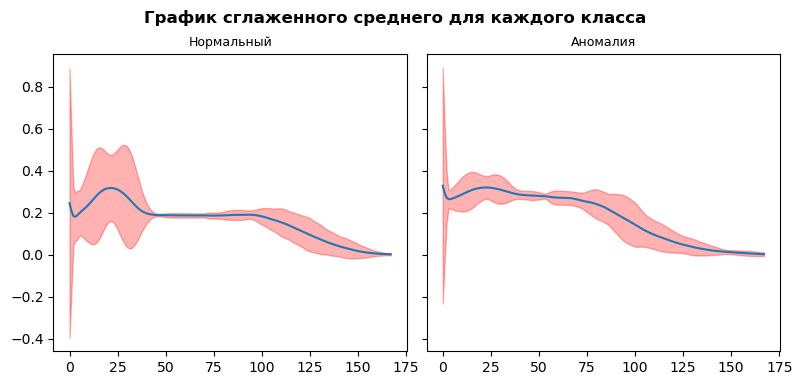

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4), sharey=True)
axes = axes.flatten()
for i, label in enumerate(CLASS_NAMES, start=1):
    data_group = df.groupby("target")
    data = data_group.get_group(label).mean(axis=0, numeric_only=True).to_numpy()
    plot_smoothed_mean(data, class_name=label, step_size=20, ax=axes[i-1])
fig.suptitle("График сглаженного среднего для каждого класса", y=0.95, weight="bold")
plt.tight_layout()

## Разделение данных на обучающий и тестовый наборы

In [57]:
normal_df.drop("target", axis=1, errors="ignore", inplace=True)
normal = normal_df.to_numpy()
anomaly_df.drop("target", axis=1, errors="ignore", inplace=True)
anomaly = anomaly_df.to_numpy()

X_train, X_test = train_test_split(normal, test_size=0.15, random_state=45, shuffle=True)
print(f"Обучающий пример: {X_train.shape}, Тестовый пример: {X_test.shape}, Аномальный пример: {anomaly.shape}")

Обучающий пример: (3438, 187), Тестовый пример: (607, 187), Аномальный пример: (10505, 187)


# Построение модели автоэнкодера CNN
## Об автоэнкодерах: изучение эффективных представлений данных

Автоэнкодеры — это класс архитектур нейронных сетей, обычно используемых в задачах машинного обучения без учителя и глубокого обучения. Их основная цель — обнаружить и изучить эффективные представления данных путем их кодирования в скрытое пространство меньшей размерности и последующего декодирования обратно в исходную форму. Автоэнкодеры играют решающую роль в различных приложениях, таких как уменьшение размерности, шумоподавление данных, обнаружение аномалий и генеративное моделирование.

Основные компоненты автокодировщика состоят из кодера и декодера. Кодер отображает входные данные в скрытое пространство, а декодер восстанавливает данные из их закодированного представления. Во время обучения автоэнкодеры стремятся минимизировать ошибку восстановления между входными и декодированными выходными данными, что приводит к обучению значимых представлений данных.

Автоэнкодеры предлагают универсальный инструмент для извлечения признаков, сжатия данных и многого другого, что делает их ценным дополнением к набору инструментов специалистов по обработке данных и практиков машинного обучения.

In [ ]:
import tensorflow as tf

In [59]:
tf.keras.utils.set_random_seed(1024)

NameError: name 'tf' is not defined

In [58]:
class AutoEncoder(Model):
    def __init__(self, input_dim, latent_dim):
        super(AutoEncoder, self).__init__()
        self.input_dim = input_dim
        self.latent_dim = latent_dim

        self.encoder = tf.keras.Sequential([
            layers.Input(shape=(input_dim,)),
            layers.Reshape((input_dim, 1)),  # Reshape to 3D for Conv1D
            layers.Conv1D(128, 3, strides=1, activation='relu', padding="same"),
            layers.BatchNormalization(),
            layers.MaxPooling1D(2, padding="same"),
            layers.Conv1D(128, 3, strides=1, activation='relu', padding="same"),
            layers.BatchNormalization(),
            layers.MaxPooling1D(2, padding="same"),
            layers.Conv1D(latent_dim, 3, strides=1, activation='relu', padding="same"),
            layers.BatchNormalization(),
            layers.MaxPooling1D(2, padding="same"),
        ])
        # Previously, I was using UpSampling. I am trying Transposed Convolution this time around.
        self.decoder = tf.keras.Sequential([
            layers.Conv1DTranspose(latent_dim, 3, strides=1, activation='relu', padding="same"),
#             layers.UpSampling1D(2),
            layers.BatchNormalization(),
            layers.Conv1DTranspose(128, 3, strides=1, activation='relu', padding="same"),
#             layers.UpSampling1D(2),
            layers.BatchNormalization(),
            layers.Conv1DTranspose(128, 3, strides=1, activation='relu', padding="same"),
#             layers.UpSampling1D(2),
            layers.BatchNormalization(),
            layers.Flatten(),
            layers.Dense(input_dim)
        ])

    def call(self, X):
        encoded = self.encoder(X)
        decoded = self.decoder(encoded)
        return decoded


input_dim = X_train.shape[-1]
latent_dim = 32

model = AutoEncoder(input_dim, latent_dim)
model.build((None, input_dim))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss="mae")
model.summary()

NameError: name 'Model' is not defined